In [3]:
!pip install kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shenba/time-series-datasets")

print("Path to dataset files:", path)

100%|██████████| 19.2k/19.2k [00:00<00:00, 6.53MB/s]

Extracting files...
Path to dataset files: C:\Users\Tomasz 2115\.cache\kagglehub\datasets\shenba\time-series-datasets\versions\1


       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


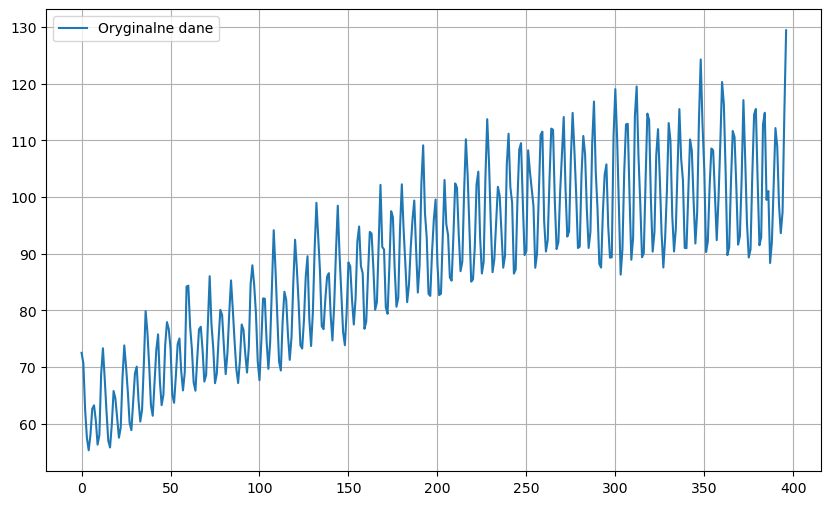

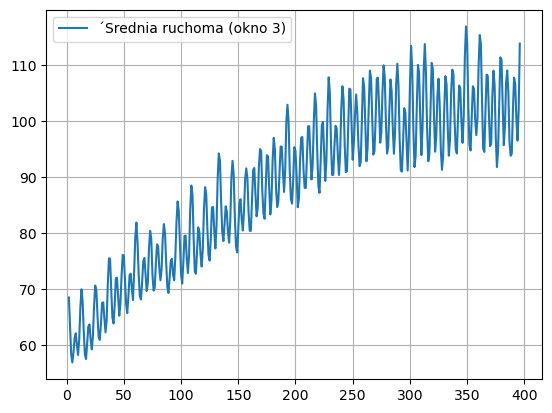

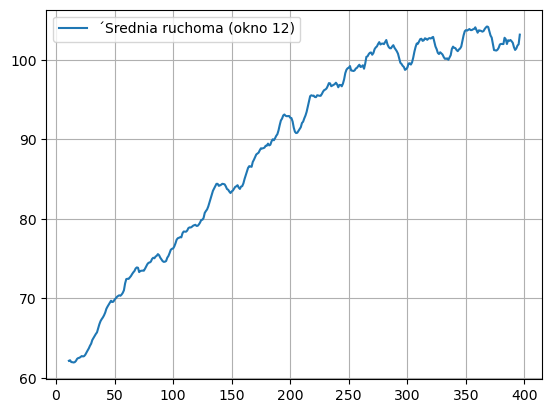

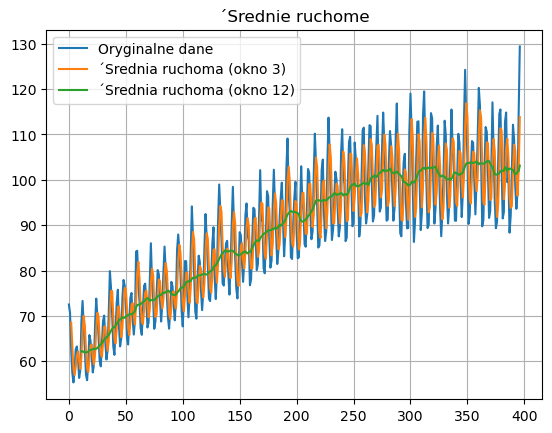

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("Electric_Production.csv")
print(df.head())
df.info()

# Obliczanie ´srednich ruchomych
df['MA_3'] = df['IPG2211A2N'].rolling(window=3).mean()
df['MA_12'] = df['IPG2211A2N'].rolling(window=12).mean()
df


# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(df['IPG2211A2N'], label="Oryginalne dane")
plt.legend()
plt.grid()
plt.show()
plt.plot(df['MA_3'], label="´Srednia ruchoma (okno 3)")
plt.legend()
plt.grid()
plt.show()
plt.plot(df['MA_12'], label="´Srednia ruchoma (okno 12)")
plt.legend()
plt.grid()
plt.show()
plt.plot(df['IPG2211A2N'], label="Oryginalne dane")
plt.plot(df['MA_3'], label="´Srednia ruchoma (okno 3)")
plt.plot(df['MA_12'], label="´Srednia ruchoma (okno 12)")
plt.title("´Srednie ruchome")
plt.legend()
plt.grid()
plt.show()

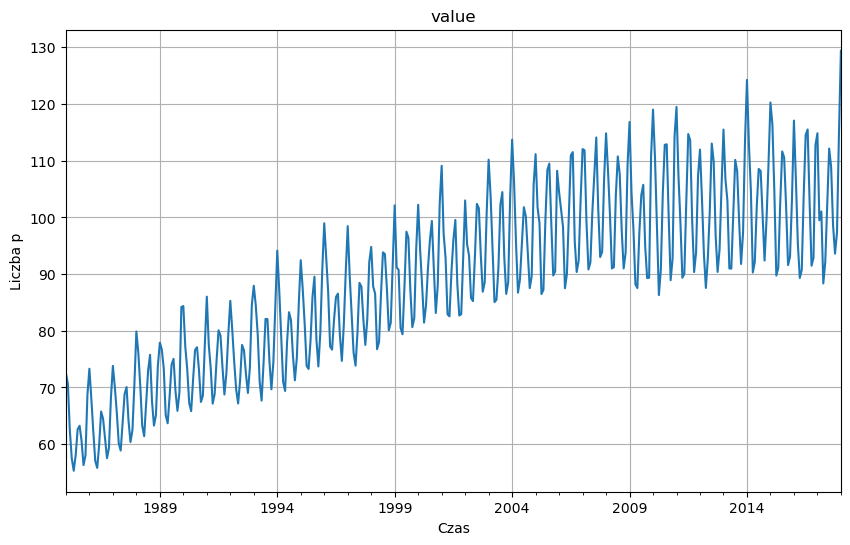

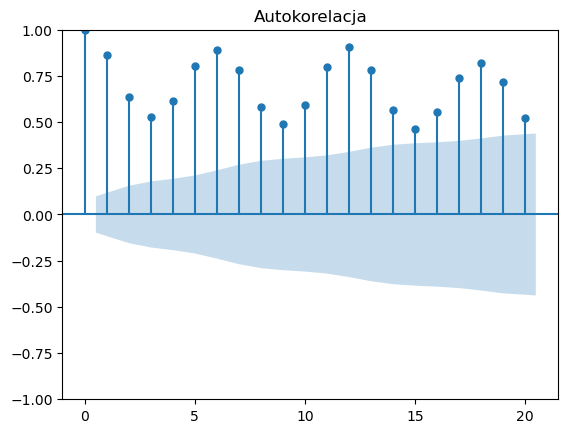

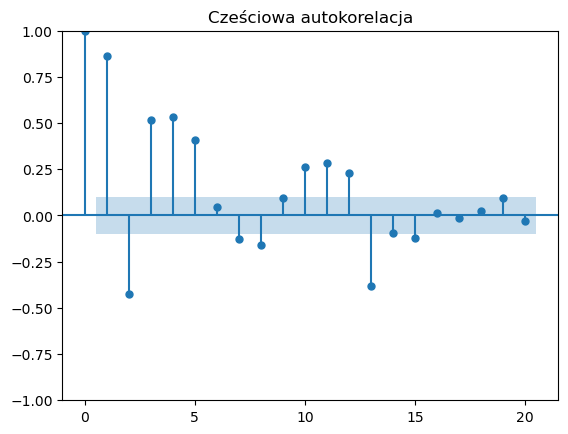

In [127]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df = df.rename(columns={'IPG2211A2N' : 'value'})
plt.figure(figsize=(10, 6))
df['value'].plot(title="value", xlabel="Czas", ylabel="Liczba p")
plt.grid()
plt.show()

plot_acf(df['value'], lags=20, title="Autokorelacja")
plot_pacf(df['value'], lags=20, title="Cześciowa autokorelacja")
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None
value    0
dtype: int64


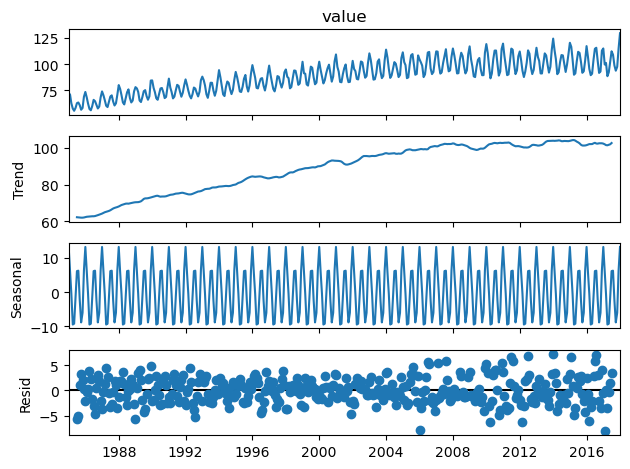

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("Electric_Production.csv")
df = df.rename(columns={'IPG2211A2N' : 'value'})

# Konwersja kolumny 'DATE' na format datetime
df['DATE'] = pd.to_datetime(df['DATE'])  

# Ustawienie indeksu na kolumnę 'DATE'
df.set_index('DATE', inplace=True)

# Sprawdzenie poprawności indeksu
print(df.info())

# Ustawienie częstotliwości (jeśli dane są dzienne)
#df = df.asfreq('M', method='pad')  # Uzupełnia brakujące wartości poprzednimi danymi

print(df.info())

# Sprawdzenie, czy są braki w danych
print(df.isna().sum())

# Dekompozycja - WAŻNE: określamy period!
result = seasonal_decompose(df['value'], model='additive')  # Okres 7 dla danych dziennych

# Wizualizacja
result.plot()
plt.show()
